# Análise exploratória de dados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML
import numpy as np

## 1. Descrição dos dados

### 1.1 Dicionário de dados:

In [2]:
dictionary = pd.read_csv("../data/external/dictionary.csv")
dictionary

,variavel,descricao,tipo,subtipo
0,instant,Índice de registro,quantitativa,discreta
1,dteday,Data,qualitativa,nominal
2,season,Estação do ano,qualitativa,ordinal
3,yr,Ano,qualitativa,ordinal
4,mnth,Mês,qualitativa,ordinal
5,holiday,Se o dia é feriado ou não,qualitativa,nominal
6,weekday,Dia da semana,qualitativa,nominal
7,workingday,Se o dia não é fim de semana e nem feriado,qualitativa,nominal
8,weathersit,Clima,qualitativa,ordinal
9,temp,Temperatura normalizada em Celsius,quantitativa,contínua


### 1.2 Conjunto de dados:

In [3]:
df = pd.read_csv("../data/raw/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## 2. Perguntas de partida e hipóteses

### A partir da análise dos dados podemos responder as seguintes perguntas:

- Quais fatores influenciam mais a demanda por bicicletas compartilhadas?
- Como a demanda por bicicletas varia ao longo do dia, da semana e das estações do ano?
- Quais são as diferenças entre o comportamento de usuários casuais e registrados?
- Quais condições climáticas têm o maior impacto negativo na utilização das bicicletas?
- Existe uma correlação significativa entre eventos especiais (como feriados e eventos locais) e o uso das bicicletas compartilhadas?
- Quais são os padrões de viagem mais comuns (ex. distância média, tempo de uso) e como eles variam entre diferentes grupos de usuários?

### Quais fatores influenciam mais a demanda por bicicletas compartilhadas?

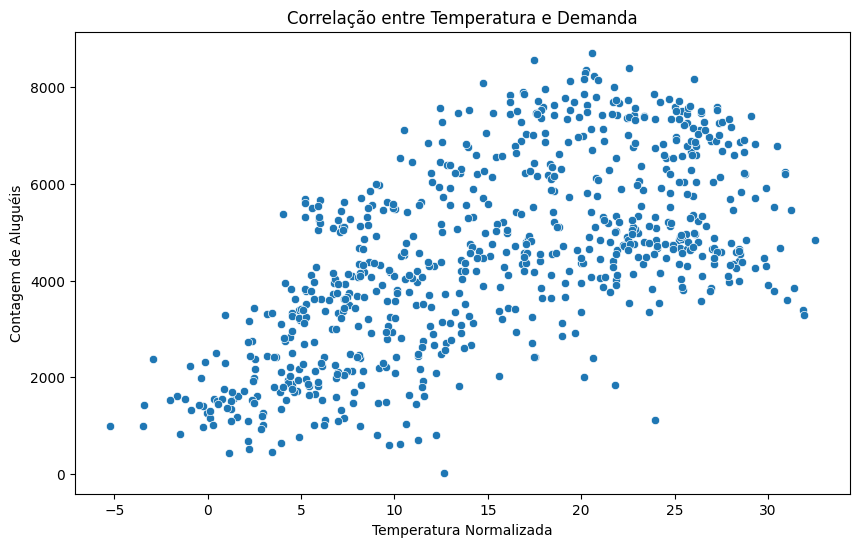

In [14]:
t_min = -8
t_max = 39
df['temp_celsius'] = df['temp'] * (t_max - t_min) + t_min
df['atemp_celsius'] = df['atemp'] * (t_max - t_min) + t_min

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_celsius', y='cnt', data=df)
plt.title('Correlação entre Temperatura e Demanda')
plt.xlabel('Temperatura Normalizada')
plt.ylabel('Contagem de Aluguéis')
plt.show()

### Como a demanda por bicicletas varia ao longo do dia, da semana e das estações do ano?

In [15]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

In [18]:
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df['weekday'] = df['weekday'].map(weekday_map)

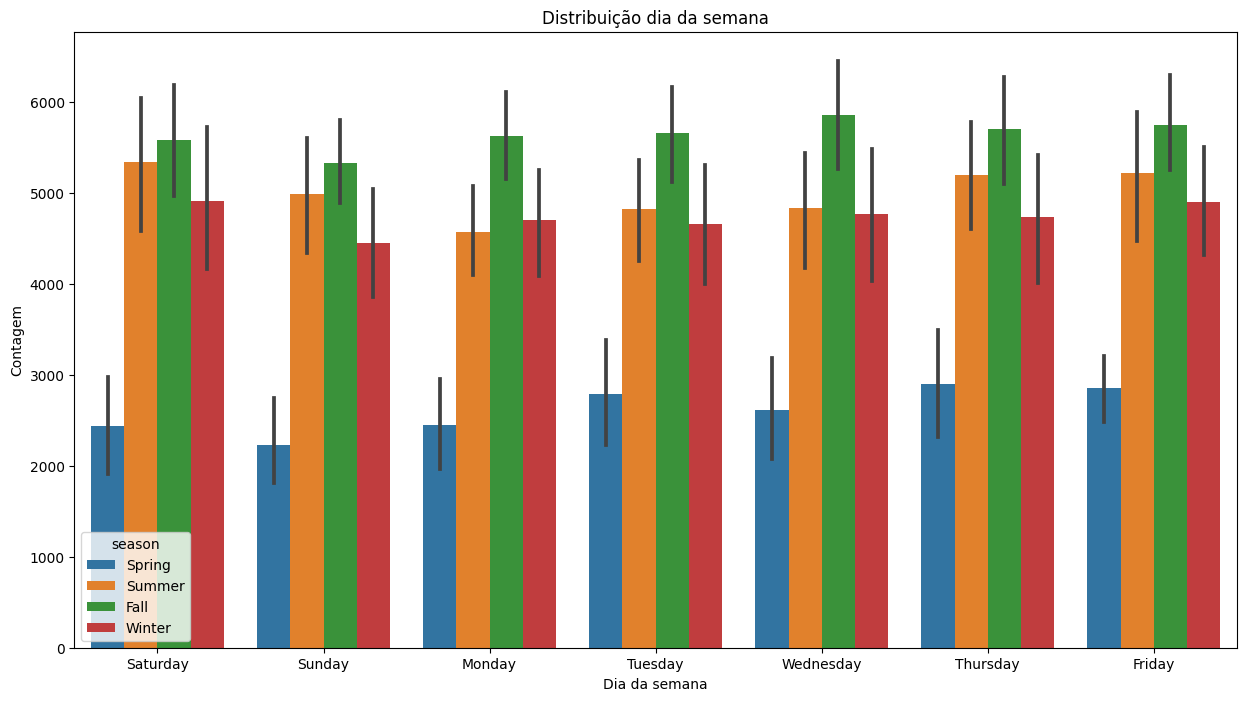

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='weekday',y='cnt',hue='season')
ax.set_title('Distribuição dia da semana')
ax.set_ylabel('Contagem')
ax.set_xlabel('Dia da semana')
plt.show()

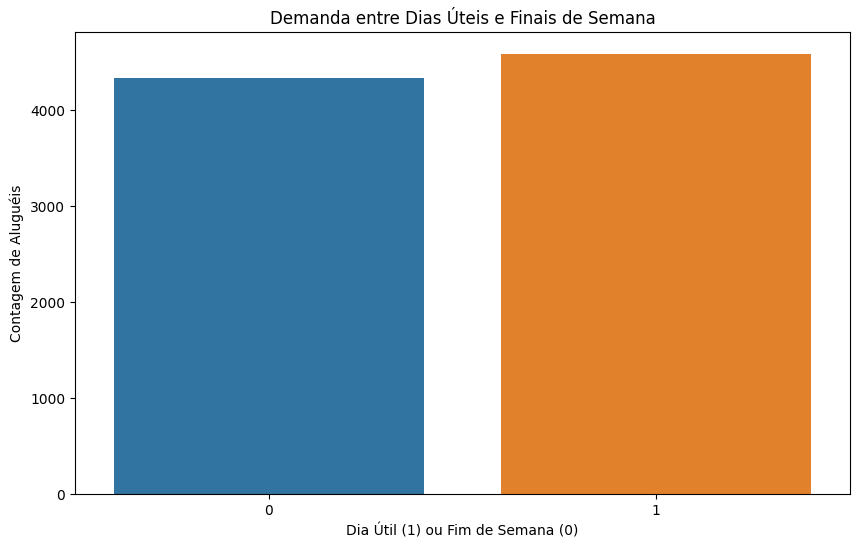

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=df, ci=None)
plt.title('Demanda entre Dias Úteis e Finais de Semana')
plt.xlabel('Dia Útil (1) ou Fim de Semana (0)')
plt.ylabel('Contagem de Aluguéis')
plt.show()

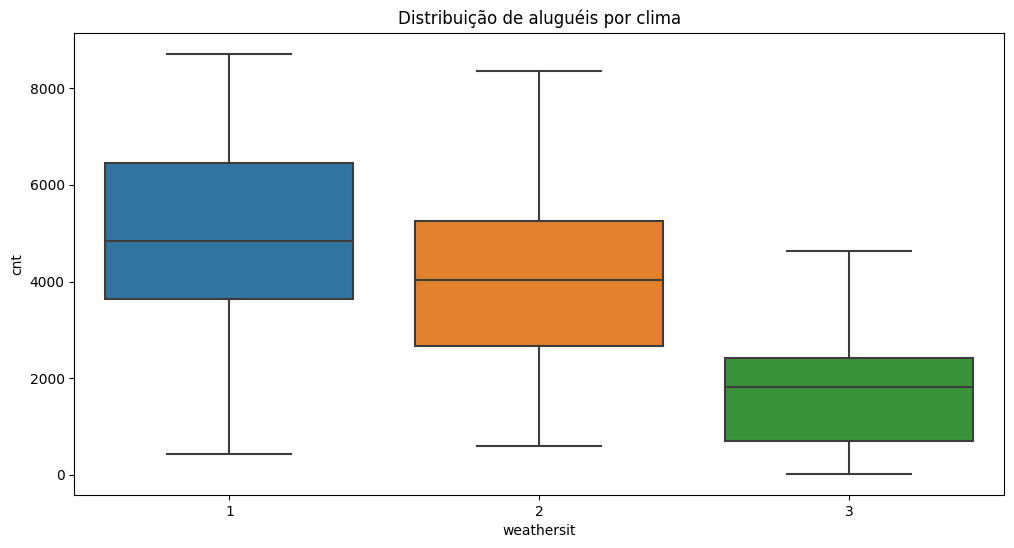

In [29]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Distribuição de aluguéis por clima')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

## 3. Insights